## Nataf - Example 2
Author: Dimitris Giovanis

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Nataf, Dependence
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt

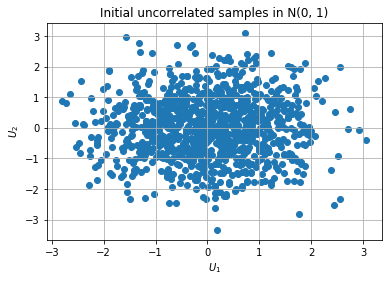

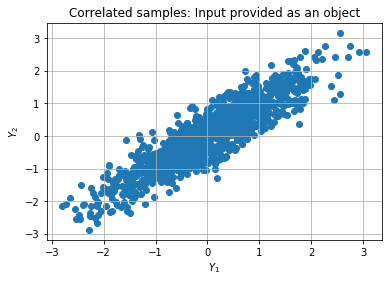

In [2]:
#In this example, the Nataf class is used in order to transform 
#1000 samples of 2 correlated standard normal variables to a lognormal and a gamma distribution. 
#The example illustrates the transformation for samples drawn using the MCS class and correlated using 
#the Dependence class and for samples specified as a numpy array.

# Generate uncorrelated standard normal samples using MCS class
x1 = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the initial samples
plt.figure()
plt.title('Initial uncorrelated samples in N(0, 1)')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()


# Correlate the samples according to the following correlation matrix
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
y1 = Dependence(x1, corr_norm=Rho)
y1.correlate()


plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y1.samples[:, 0], y1.samples[:, 1])
plt.grid(True)
plt.title('Correlated samples: Input provided as an object')
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

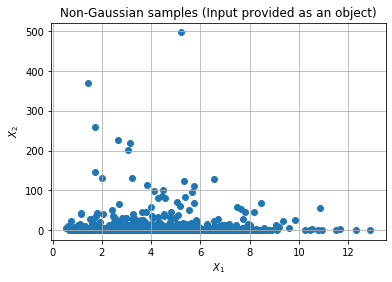

In [3]:
x_ng2 = Nataf(input_samples = x1, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
x_ng2.inverse()


plt.figure()
plt.title('Non-Gaussian samples (Input provided as an object)')
plt.scatter(x_ng2.samples[:, 0], x_ng2.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()